In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
%matplotlib inline

# Logistic Map

The logistic map is written,

$x_{n+1}$ = $x_n R(1-x_n)$,

where $x_n\in[0,1]$ represents the ratio of existing population to the maximum possible population, and $R\in[0,4]$.

More: https://en.wikipedia.org/wiki/Logistic_map

In [1]:
def logistic(x0,r,iterations):
    x1_list = []    
    for i in range(iterations):
        x1_list.append(x0)
        x1=x0*r*(1-x0)
        x0=x1
    return x1_list  

In [221]:
df = pd.DataFrame()
df2 = pd.DataFrame()

x0=0.001
iterations=1000
df['t']=list(range(iterations))
df2['t']=list(range(iterations))

for r in np.arange(1,4,0.0025):
    df[str(r)]=logistic(x0,r,iterations)

for r in np.arange(3,4,0.001):
    df2[str(r)]=logistic(x0,r,iterations)

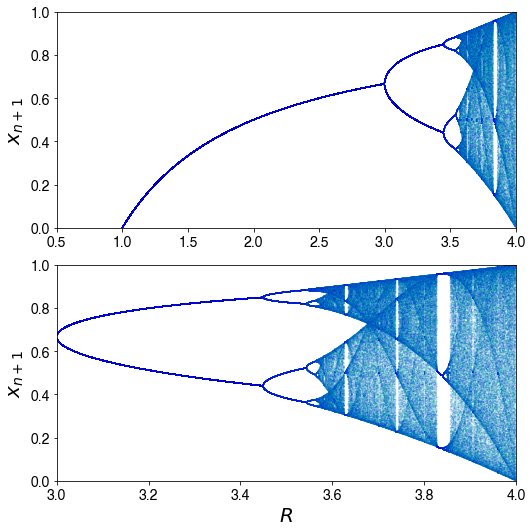

In [231]:
fig, ax = plt.subplots(2,1,figsize=(7.5,7.5))

sample=500

mydata = df.set_index('t').tail(sample)
for i in mydata.columns:    
    mydata['r'] = float(i)
    ax[0].scatter(mydata['r'], mydata[str(i)], c=mydata.index, cmap='winter_r', 
                  vmin=np.min(mydata.index), vmax=np.max(mydata.index), alpha=1, s=0.005, marker='o')

ax[0].set_ylim(0,1)
ax[0].set_xlim(0.5,4)
ax[0].tick_params(labelsize=14)
ax[0].set_ylabel('$x_{n+1}$', fontsize=20)
    
mydata = df2.set_index('t').tail(sample)
for i in mydata.columns:    
    mydata['r'] = float(i)
    ax[1].scatter(mydata['r'], mydata[str(i)], c=mydata.index, cmap='winter_r', 
                  vmin=np.min(mydata.index), vmax=np.max(mydata.index), alpha=1, s=0.005, marker='o')
    
ax[1].set_ylim(0,1)
ax[1].set_xlim(3,4)
ax[1].tick_params(labelsize=14)
ax[1].set_ylabel('$x_{n+1}$', fontsize=20)
ax[1].set_xlabel('$R$', fontsize=20)

fig.tight_layout()

In [232]:
fig.savefig('logistic_map.png', dpi=300, bbox_inches='tight')